## Movie Recomendation System

#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

#### Loading Data

In [4]:
#Ratings of users on the movies
ratings_data = pd.read_csv("data/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
ratings_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#Demographics of users
users_data = pd.read_csv("data/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])
users_data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
movies_data = pd.read_csv("data/u.item", sep="|", encoding='latin-1', header=None,
                     names=[
                         "movie_id", "title", "release_date", "video_release_date", "IMDb_URL"
                     ] + [f"genre_{i}" for i in range(19)],
                     usecols=range(24))
movies_data.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Build (Merge) The Datasets

In [7]:
data = ratings_data.merge(movies_data[['movie_id', 'title']], on='movie_id')
data = data.merge(users_data[['user_id', 'age', 'gender', 'occupation']], on='user_id')

# Drop timestamp if not used
data.drop('timestamp', axis=1, inplace=True)
data.head()

,user_id,movie_id,rating,title,age,gender,occupation
0,196,242,3,Kolya (1996),49,M,writer
1,196,257,2,Men in Black (1997),49,M,writer
2,196,111,4,"Truth About Cats & Dogs, The (1996)",49,M,writer
3,196,25,4,"Birdcage, The (1996)",49,M,writer
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   movie_id    100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   title       100000 non-null  object
 4   age         100000 non-null  int64 
 5   gender      100000 non-null  object
 6   occupation  100000 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


#### Explatory Data Analysis

##### 1-Basic Data Information 

In [9]:
print("Data shape:", data.shape)
print("Unique users:", data['user_id'].nunique())
print("Unique movies:", data['movie_id'].nunique())
print("Unique ratings:", data['rating'].unique())
print("Users age range:", data['age'].min(), "-", data['age'].max())

data.head()

Data shape: (100000, 7)
Unique users: 943
Unique movies: 1682
Unique ratings: [3 2 4 5 1]
Users age range: 7 - 73


,user_id,movie_id,rating,title,age,gender,occupation
0,196,242,3,Kolya (1996),49,M,writer
1,196,257,2,Men in Black (1997),49,M,writer
2,196,111,4,"Truth About Cats & Dogs, The (1996)",49,M,writer
3,196,25,4,"Birdcage, The (1996)",49,M,writer
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer


##### 2-Distribution of Ratings

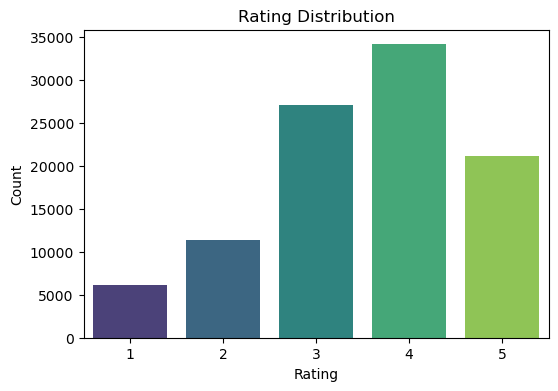

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='rating', palette='viridis')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Most ratings are 4 or 5, showing that users tend to give favorable feedback.

In [11]:
#Average Rating Score:
average_rating = data['rating'].mean()
print("Average Rating Score:", average_rating)

Average Rating Score: 3.52986


The average rating score is 3.5

##### 3-Ratings Per User

c:\Users\Beast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


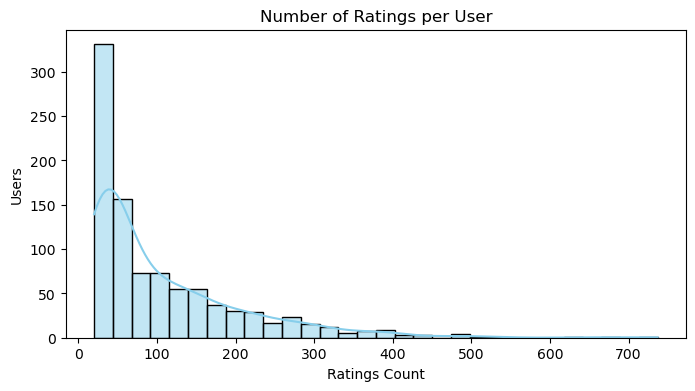

In [12]:
ratings_per_user = data.groupby('user_id').size()

plt.figure(figsize=(8,4))
sns.histplot(ratings_per_user, bins=30, kde=True, color='skyblue')
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.ylabel("Users")
plt.show()


We can see that each user has rated at least 20~30 movies.

##### 4-Ratings Per Movie

c:\Users\Beast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


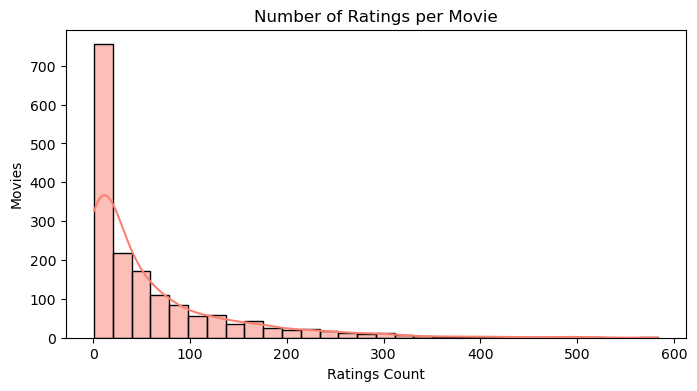

In [13]:
ratings_per_movie = data.groupby('movie_id').size()

plt.figure(figsize=(8,4))
sns.histplot(ratings_per_movie, bins=30, kde=True, color='salmon')
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings Count")
plt.ylabel("Movies")
plt.show()


Most movies have few ratings; only a small number are frequently rated, showing a strong popularity bias in the dataset.

##### 5-Heatmap of User-Movie Ratings (Sample)

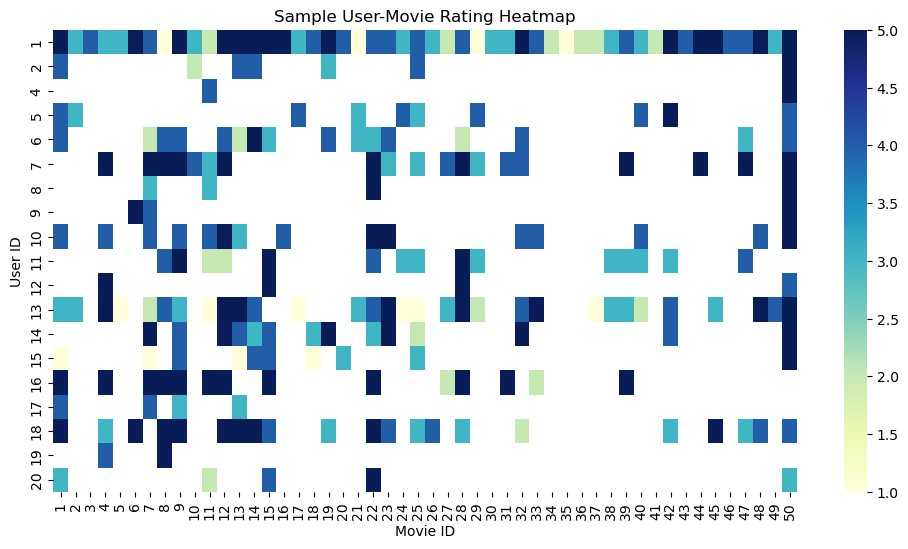

In [14]:
sample = data[(data['user_id'] <= 20) & (data['movie_id'] <= 50)]
pivot = sample.pivot_table(index='user_id', columns='movie_id', values='rating')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', cbar=True)
plt.title("Sample User-Movie Rating Heatmap")
plt.xlabel("Movie ID")
plt.ylabel("User ID")
plt.show()


##### 6-Demographics of Users

###### 6.1-Gender Distribution

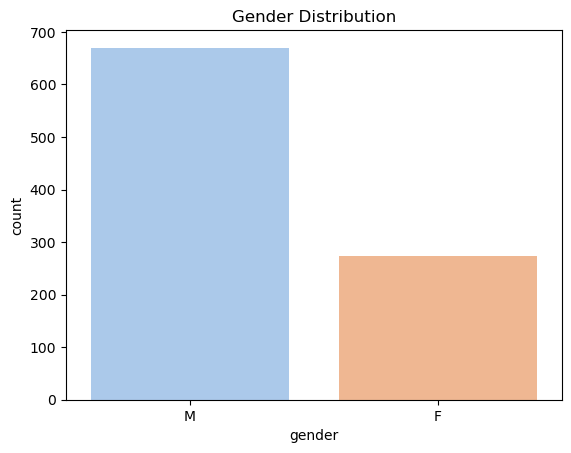

In [15]:
sns.countplot(data=users_data, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.show()

Most users in the dataset are males

###### 6.2-Age Distribution

c:\Users\Beast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


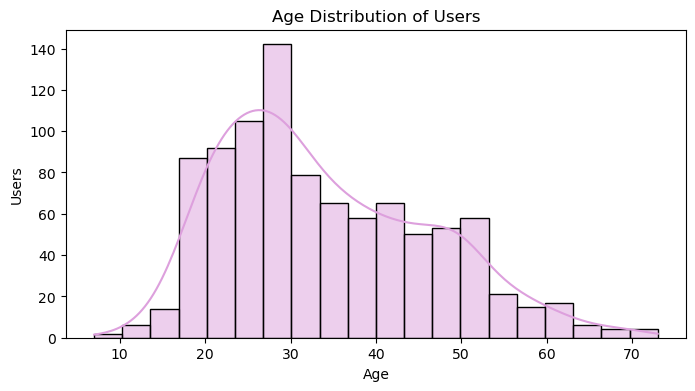

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(users_data['age'], bins=20, kde=True, color='plum')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Users")
plt.show()


The age is ranging from 7 to 79 years with an average of 27 years.

###### 6.3-Occupation Breakdown

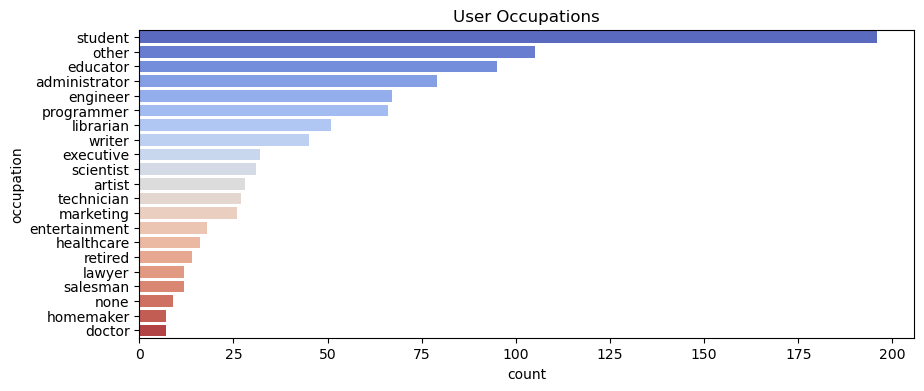

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(data=users_data, y='occupation', order=users_data['occupation'].value_counts().index, palette='coolwarm')
plt.title("User Occupations")
plt.show()

Most of the users are students

#### Loading the Train and Test data (already splitted and available with the data folder)

In [18]:
#Load pre-defined split
train_data = pd.read_csv("data/u1.base", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
test_data = pd.read_csv("data/u1.test", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

#Drop timestamps
train_data.drop('timestamp', axis=1, inplace=True)
test_data.drop('timestamp', axis=1, inplace=True)

In [19]:
train_data.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [20]:
test_data.head()

,user_id,movie_id,rating
0,1,6,5
1,1,10,3
2,1,12,5
3,1,14,5
4,1,17,3


#### User-Item Matrix
Lets make a pivot table in order to make rows are users and columns are movies. And values are rating

In [21]:
train_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating')
train_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* As it can be seen from table above, rows are users, columns are movies and values are ratings.
* For example user 1 gives 3.0 rating to movie_id "2" and gives 4.0 rating to movie_id "3".

#### Calculate User Similarity
We will use cosine similarity

Cosine similarity measures the angle between two vectors:

It compares how similar the rating patterns of two users are.

It ignores magnitude (i.e., it doesn’t care if User A always rates 1 star higher than User B).
Range:

+1 = identical preferences

0 = no correlation

–1 = opposite preferences

* You can find the most similar users to a given user.
* Recommend movies that similar users liked — even if the target user hasn’t rated them.

In [22]:
#Fill NaN with 0 for similarity calc
train_matrix = train_matrix.fillna(0)
user_similarity = cosine_similarity(train_matrix)
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=train_matrix.index, 
                                  columns=train_matrix.index)

In [23]:
user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.097021,0.052469,0.021162,0.193545,0.290114,0.200438,0.097786,0.060791,0.200926,...,0.252187,0.090728,0.216186,0.139478,0.156937,0.095265,0.222958,0.158151,0.133090,0.252778
2,0.097021,1.000000,0.051348,0.084426,0.015516,0.187717,0.074479,0.023262,0.108167,0.078176,...,0.083045,0.298811,0.308608,0.403810,0.282896,0.213233,0.189257,0.132806,0.126597,0.101784
3,0.052469,0.051348,1.000000,0.145660,0.037180,0.084526,0.015718,0.086400,0.000000,0.030909,...,0.041330,0.036956,0.135750,0.063940,0.102082,0.034064,0.133720,0.083537,0.081230,0.019676
4,0.021162,0.084426,0.145660,1.000000,0.017291,0.000000,0.037566,0.046087,0.000000,0.023232,...,0.014238,0.047742,0.127305,0.118947,0.089016,0.039116,0.120521,0.135669,0.125925,0.035586
5,0.193545,0.015516,0.037180,0.017291,1.000000,0.158552,0.170890,0.157488,0.053846,0.089508,...,0.284295,0.074215,0.086345,0.063759,0.126358,0.068145,0.198118,0.142141,0.150000,0.239803


#### Recommend Movies Based on Similar Users

In [ ]:
def recommend_movies(user_id, user_matrix, similarity_df, top_n=5):
    #1. Find similar users (excluding the target user)
    similar_users = similarity_df[user_id].drop(user_id).sort_values(ascending=False)
    
    #2. Get ratings from these similar users
    similar_users_ratings = user_matrix.loc[similar_users.index]
    
    #3. Compute weighted ratings for each movie
    weighted_ratings = similar_users_ratings.T.dot(similar_users)
    weighted_ratings /= similar_users.sum()
    
    #4. Exclude movies the target user has already rated
    seen_movies = user_matrix.loc[user_id]
    unseen = seen_movies[seen_movies == 0].index
    
    #5. Recommend top N movies the user hasn't seen, sorted by predicted score
    recommendations = weighted_ratings[unseen].sort_values(ascending=False).head(top_n)
    return recommendations

#### Evaluate Using Precision@K
Precision@K (Precision at Top-K) measures the accuracy of the top K recommendations made by the system.

In [25]:
def precision_at_k(user_id, k=5):
    if user_id not in test_data['user_id'].values:
        print(f"User ID {user_id} not found in test data.")
        return None

    #Get top-k recommended movies
    recs = recommend_movies(user_id, train_matrix, user_similarity_df, top_n=k)

    #Map movie IDs to titles (assumes you have a movie_id -> title mapping)
    movie_id_to_title = dict(zip(movies_data['movie_id'], movies_data['title']))
    rec_titles = [movie_id_to_title.get(mid, f"Movie {mid}") for mid in recs.index]

    #Movies the user rated 4 or 5 in the test set (considered relevant)
    user_test_data = test_data[test_data['user_id'] == user_id]
    relevant = set(user_test_data[user_test_data['rating'] >= 4]['movie_id'])
    relevant_titles = [movie_id_to_title.get(mid, f"Movie {mid}") for mid in relevant]

    #Count hits
    hits = [1 for movie_id in recs.index if movie_id in relevant]
    num_hits = sum(hits)
    precision = num_hits / k

    print(f"\n🎯 Precision@{k} for User ID {user_id}:")
    print(f"- 🧠 Top {k} Recommended Movies: {rec_titles}")
    print(f"- ✅ Relevant Movies (rated ≥ 4): {relevant_titles}")
    print(f"- ✔️ Hits (Correct Recommendations): {num_hits}")
    print(f"- 📊 Precision@{k} = {num_hits} / {k} = {precision:.3f}")

    return precision


#### Main Application

In [32]:
import random

#Get all unique user IDs in the test set
test_users = test_data['user_id'].unique()

#Randomly select up to 100 users
num_users = min(5, len(test_users))
random_users = random.sample(list(test_users), num_users)

#Compute precision@5 for each randomly selected user — only call the function once per user
precisions = []
for uid in random_users:
    score = precision_at_k(uid, k=5)
    if score is not None:
        precisions.append(score)

#Calculate and print the average
if precisions:
    print("Average Precision@5:", sum(precisions) / len(precisions))
else:
    print("No valid users found for evaluation.")


🎯 Precision@5 for User ID 55:
- 🧠 Top 5 Recommended Movies: ['Toy Story (1995)', 'Fargo (1996)', 'Godfather, The (1972)', 'Empire Strikes Back, The (1980)', 'Silence of the Lambs, The (1991)']
- ✅ Relevant Movies (rated ≥ 4): ['Pulp Fiction (1994)', 'Blade Runner (1982)', 'Die Hard (1988)', 'Heat (1995)']
- ✔️ Hits (Correct Recommendations): 0
- 📊 Precision@5 = 0 / 5 = 0.000

🎯 Precision@5 for User ID 122:
- 🧠 Top 5 Recommended Movies: ['Star Wars (1977)', 'Raiders of the Lost Ark (1981)', 'Return of the Jedi (1983)', 'Fargo (1996)', 'Silence of the Lambs, The (1991)']
- ✅ Relevant Movies (rated ≥ 4): ['Age of Innocence, The (1993)', 'E.T. the Extra-Terrestrial (1982)', 'Exotica (1994)', 'Brazil (1985)', 'Godfather: Part II, The (1974)', 'Amadeus (1984)', 'Sex, Lies, and Videotape (1989)', 'Four Weddings and a Funeral (1994)', 'To Die For (1995)', 'Vanya on 42nd Street (1994)', 'Unbearable Lightness of Being, The (1988)', 'Immortal Beloved (1994)', 'Field of Dreams (1989)', 'Shadowlan